In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn
import collections

#Set parameters
%matplotlib inline
pd.options.display.max_rows = 30

In [2]:
# Load data from csv file
file_path = os.path.join(os.pardir, 'data', 'raw','survey_results_public.csv')
df = pd.read_csv(file_path)

In [3]:
## Total number of respondents
print(f'Total number of respondents: {df.shape[0]}')

Total number of respondents: 88883


In [4]:
df.dropna(axis=0, subset=['MainBranch'], inplace=True)

## 1. Top 10 loved/dreaded/wanted languages

In [4]:
# Count of Null values in LanguageWorkedWith and LanguageDesireNextYear columns
print(f'Number of null values in Main Branch column: {np.sum(df.MainBranch.isnull() == True)}')
print(f'Number of null values in both LanguageWorkedWith and LanguageDesireNextYear columns: {np.sum((df.LanguageWorkedWith.isnull() == True) & (df.LanguageDesireNextYear.isnull() == True))}')
print(f'Number of null values in LanguageWorkedWith column: {np.sum(df.LanguageWorkedWith.isnull() == True)}')
print(f'Number of null values in LanguageDesireNextYear column: {np.sum(df.LanguageDesireNextYear.isnull() == True)}')

Number of null values in Main Branch column: 552
Number of null values in both LanguageWorkedWith and LanguageDesireNextYear columns: 686
Number of null values in LanguageWorkedWith column: 1314
Number of null values in LanguageDesireNextYear column: 4795


In [5]:
# Filling the null columns with Not Available value
df.fillna(value='Not Available', inplace=True)

In [6]:
# Initialize loved, dreaded, wanted dictionary
loved_lang = {}
dreaded_lang = {}
wanted_lang = {}

In [7]:
# Split string by ;
def split_string(string):
    '''Split the string with semi-colon(;) and return the list of words'''
    words = string.split(';')
    return words

In [8]:
def lang_dict(lang_list, dictionary):
    '''Stores languages in dictionary'''
    for lang in lang_list:
        dictionary.setdefault(lang, int())
        dictionary[lang] = dictionary[lang] + 1

In [9]:
def sort_dictionary(dictionary):
    '''Sorts the dictionary and returns sorted dict'''
    sorted_x = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)
    sorted_dict = collections.OrderedDict(sorted_x)
    return sorted_dict 

In [10]:
def identify_languages(lang_worked, lang_desired):
    '''
    Idenitifies loved, dreaded and wanted languages from lang_worked and lang_desired lists.
    
    Languages which are available in both langs_worked and langs_desired are Loved languages.
    
    Languages which are available in working column but not in desired columns are dreaded languages.
    
    Languages which are available in desired column but not in desire column but not in working column.
    are wanted languages
    
    '''
    loved_lang = {}
    dreaded_lang = {}
    wanted_lang = {}
    all_lang = {}
    for worked, desired in zip(lang_worked, lang_desired):
        # Store the languages in set
        langs_worked = set(split_string(worked))
        langs_desired = set(split_string(desired))
             
        intersection = langs_worked.intersection(langs_desired)
        dreaded_diff = langs_worked.difference(langs_desired)
        wanted_diff = langs_desired.difference(langs_worked)
        
        # Store the languages in respective dictionaries
        lang_dict(langs_worked, all_lang)
        lang_dict(intersection, loved_lang)    
        lang_dict(dreaded_diff, dreaded_lang)
        lang_dict(wanted_diff, wanted_lang)
    return all_lang,loved_lang, dreaded_lang, wanted_lang

In [11]:
#Retrive all languages, loved languages, wanted languages and dreaded languages
all_lang,loved_lang,dreaded_lang,wanted_lang = identify_languages(df.LanguageWorkedWith, df.LanguageDesireNextYear)

In [12]:
lang_info = pd.DataFrame(index=all_lang.keys(), columns=['Loved', 'Dreaded', 'Wanted'], dtype=float)

In [13]:
# Percentage of developers who are currently working in language also interested in working with in next year
for lang, count in loved_lang.items():
    temp = all_lang[lang]
    percentage = (count/temp)*100
    lang_info.at[lang, 'Loved'] = percentage

In [14]:
# Percentage of developers who are currenlty working in language is
# not interested in working with it next year
for lang, count in dreaded_lang.items():
    temp = all_lang[lang]
    percent = (count/temp)*100
    lang_info.at[lang, 'Dreaded'] = percent

In [15]:
# Percentage of developers who are currently are not working in language 
# interested in working with it next year
developers = df.shape[0]
for lang, count in wanted_lang.items():
    temp = developers - all_lang[lang]   
    percent = (count/temp)*100
    lang_info.at[lang, 'Wanted'] = percent

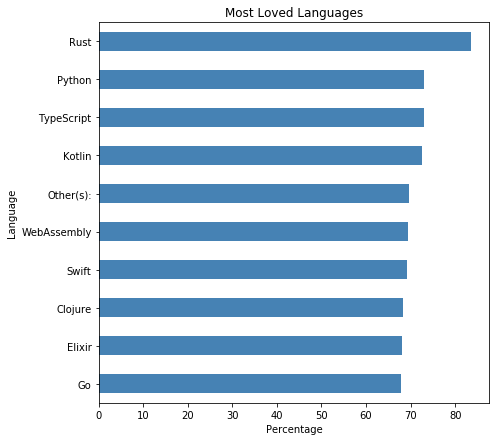

In [16]:
fig = lang_info.nlargest(10, 'Loved').Loved.plot(kind='barh', figsize=(7,7), color='steelblue');
fig.invert_yaxis()
plt.title('Most Loved Languages');
plt.ylabel('Language');
plt.xlabel('Percentage');

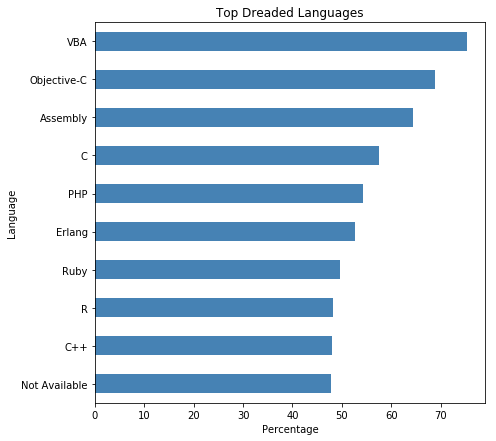

In [17]:
fig = lang_info.nlargest(10, 'Dreaded').Dreaded.plot(kind='barh', figsize=(7,7), color='steelblue');
fig.invert_yaxis()
plt.title('Top Dreaded Languages');
plt.ylabel('Language');
plt.xlabel('Percentage');

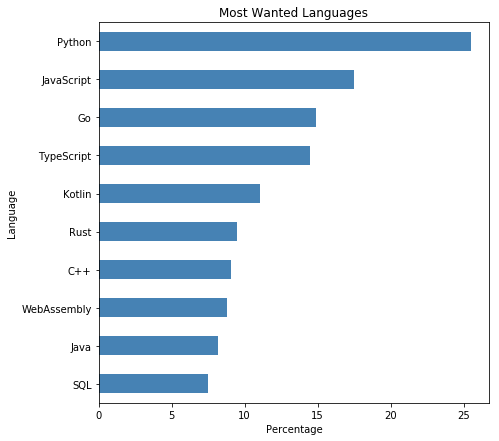

In [18]:
fig = lang_info.nlargest(10, 'Wanted').Wanted.plot(kind='barh', figsize=(7,7), color='steelblue');
fig.invert_yaxis()
plt.title('Most Wanted Languages');
plt.ylabel('Language');
plt.xlabel('Percentage');